In [75]:
import pandas as pd
import numpy as np

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [77]:
df1 = pd.read_csv("/Users/haowu/Desktop/Boston University Graduate Study/CS 677/Term Project/kc_house_data.csv")
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

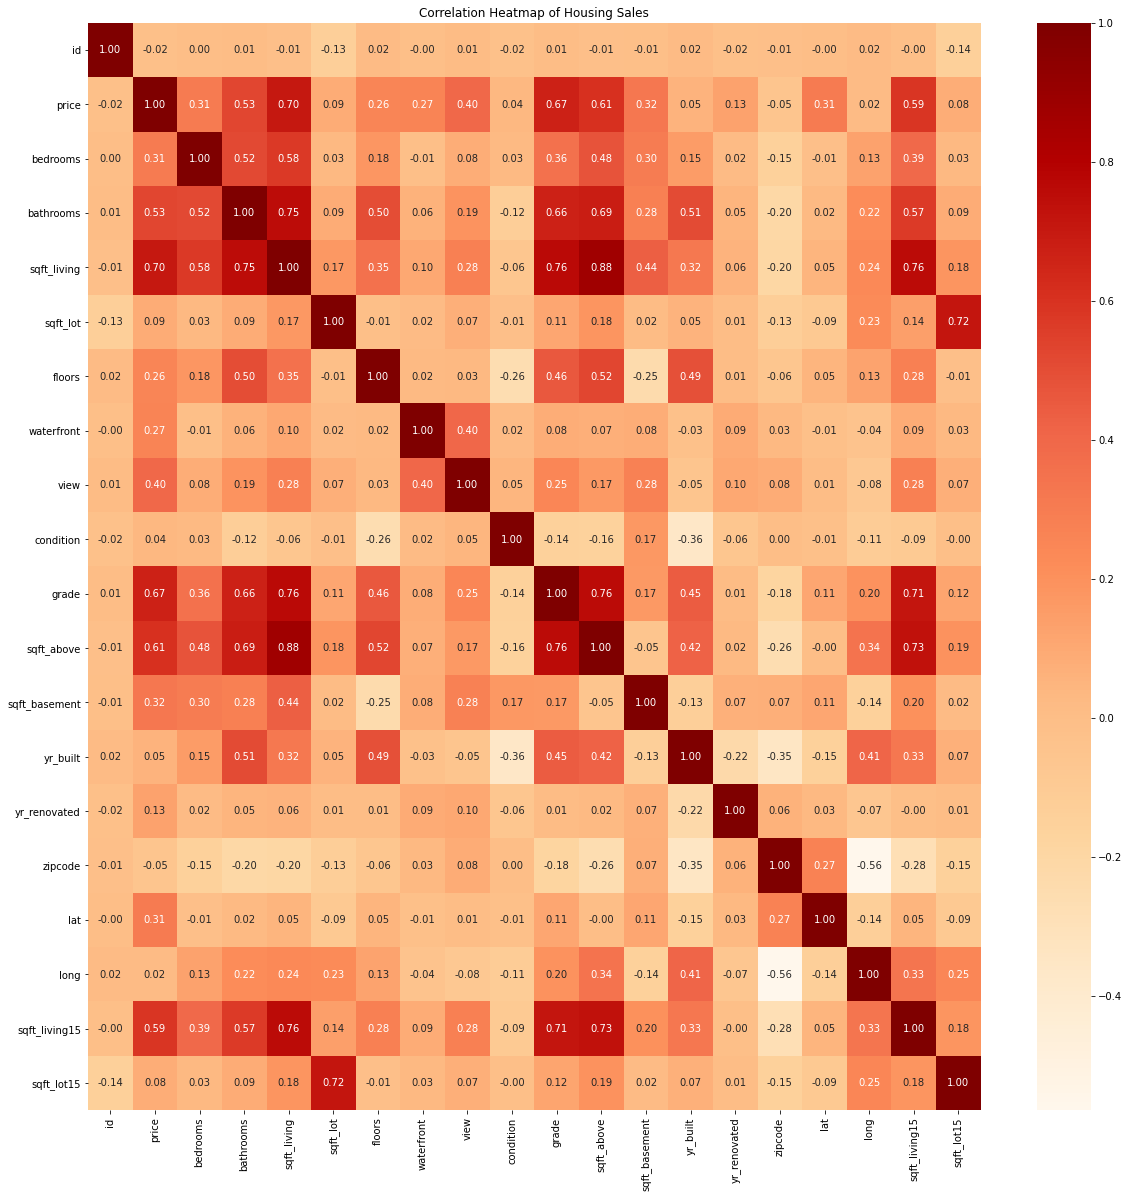

In [79]:
corrmat = df1.corr()
# corrmat

plt.figure(figsize=(20, 20))
ax = sns.heatmap(corrmat, annot=True, fmt='.2f',cmap='OrRd')
ax.set_title('Correlation Heatmap of Housing Sales')
plt.show()

In [80]:
df1.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

<AxesSubplot:xlabel='grade', ylabel='price'>

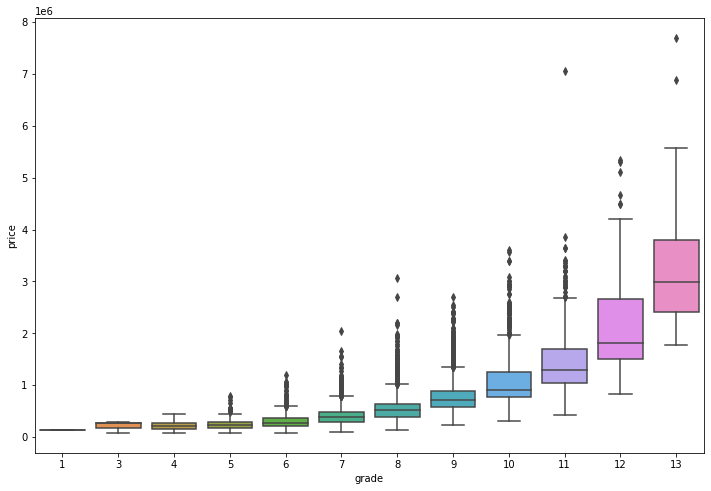

In [81]:
plt.figure(figsize=(12,8))
sns.boxplot(x='grade',y='price',data=df1)

<AxesSubplot:xlabel='view', ylabel='price'>

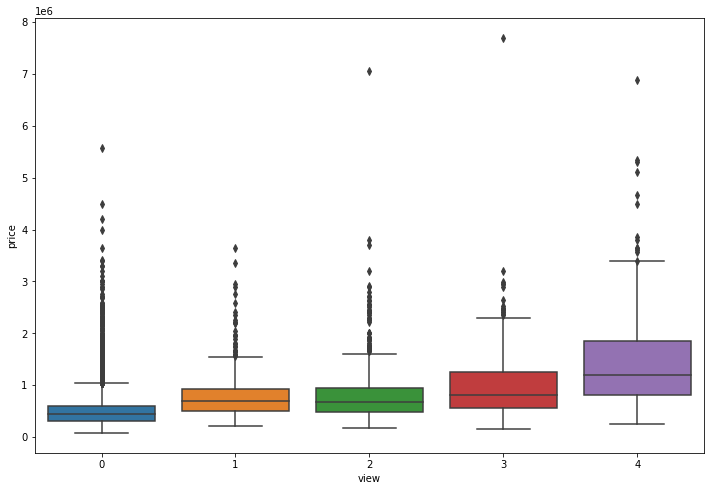

In [82]:
plt.figure(figsize=(12,8))
sns.boxplot(x='view',y='price',data=df1)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

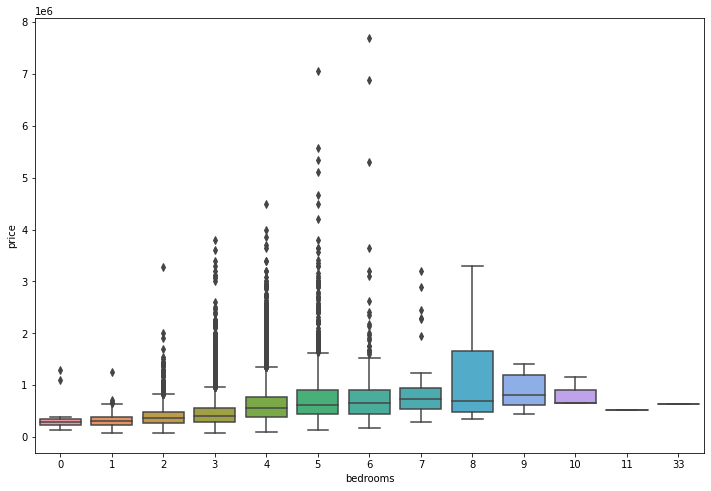

In [83]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df1)

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

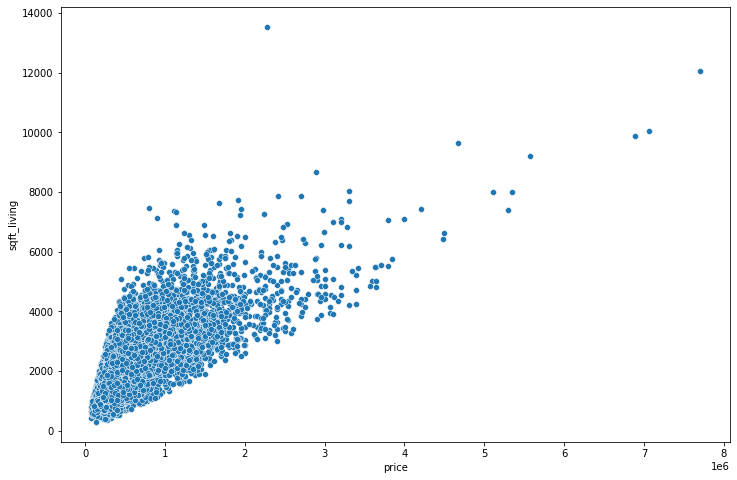

In [84]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df1)

<AxesSubplot:xlabel='price', ylabel='sqft_basement'>

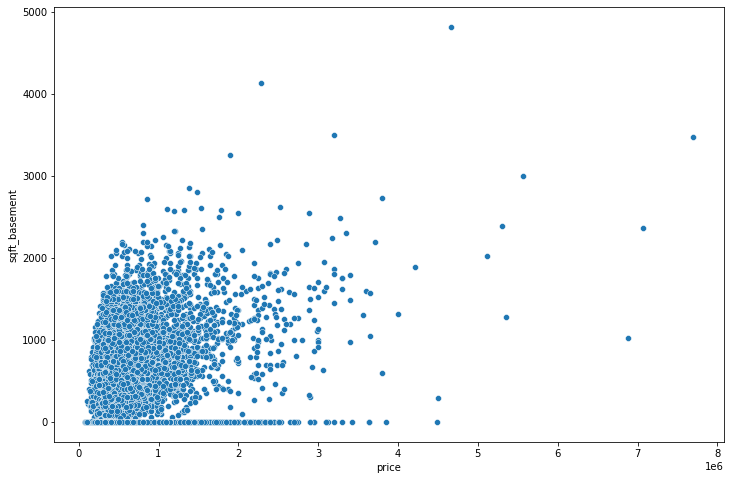

In [85]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_basement',data=df1)

In [86]:
missing = df1.isnull().sum()
missing.head()

id           0
date         0
price        0
bedrooms     0
bathrooms    0
dtype: int64

In [87]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, max_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [88]:
X = df1[["bedrooms","bathrooms","sqft_living","sqft_living15","grade","sqft_above","sqft_basement"]]
y = df1["price"]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=2)

In [90]:
st = StandardScaler()
st.fit(X_train)
X_train = st.transform(X_train)
X_test = st.transform(X_test)

In [91]:
linear= LinearRegression()
linear.fit(X_train, y_train)
ypred_train = linear.predict(X_train)
ypred_test = linear.predict(X_test)
print("Training MAE:")
print(mae(y_train, ypred_train))

print("Testing MAE:")
print(mae(y_test, ypred_test))

print("Training R2_Score:")
print(r2_score(y_train, ypred_train))

print("Testing R2_Score:")
r2_lin = r2_score(y_test, ypred_test)
print(r2_lin)

Training MAE:
159077.98503028337
Testing MAE:
161193.70376893153
Training R2_Score:
0.5528080000981601
Testing R2_Score:
0.5468517802652377


In [92]:
acc = np.mean(y_test == ypred_test)
acc

0.0

In [93]:
treedecision = DecisionTreeRegressor()
treedecision.fit(X_train, y_train)
ytreepred_train = treedecision.predict(X_train)
ytreepred_test = treedecision.predict(X_test)
print("Training MAE:")
print(mae(y_train, ytreepred_train))

print("Testing MAE:")
print(mae(y_test, ytreepred_test))

print("Training R2_Score:")
print(r2_score(y_train, ytreepred_train))

print("Testing R2_Score:")
r2_tree = r2_score(y_test, ytreepred_test)
print(r2_score(y_test, ytreepred_test))

Training MAE:
2660.621500732629
Testing MAE:
196434.28479451
Training R2_Score:
0.9978751128112539
Testing R2_Score:
0.26222498024216434


In [94]:
acc2 = np.mean(y_test == ytreepred_test)
acc2

0.003932454314133704

In [95]:
random=RandomForestRegressor(n_estimators = 10,random_state=0)
random.fit(X_train,y_train)
randompred_train = random.predict(X_train)
randompred_test = random.predict(X_test)
print("Training MAE:")
print(mae(y_train, randompred_train))

print("Testing MAE:")
print(mae(y_test, randompred_test))

print("Training R2_Score:")
print(r2_score(y_train, randompred_train))

print("Testing R2_Score:")
r2_random = r2_score(y_test, randompred_test)
print(r2_score(y_test, randompred_test))

Training MAE:
61369.19728718178
Testing MAE:
153652.09571763285
Training R2_Score:
0.9240750142137975
Testing R2_Score:
0.5751970546965135


In [96]:
random=RandomForestRegressor(n_estimators = 100,random_state=0)
random.fit(X_train,y_train)
randompred_train = random.predict(X_train)
randompred_test = random.predict(X_test)
print("Training MAE:")
print(mae(y_train, randompred_train))

print("Testing MAE:")
print(mae(y_test, randompred_test))

print("Training R2_Score:")
print(r2_score(y_train, randompred_train))

print("Testing R2_Score:")
r2_random = r2_score(y_test, randompred_test)
print(r2_score(y_test, randompred_test))

Training MAE:
56051.39220779392
Testing MAE:
149599.72487929213
Training R2_Score:
0.9434152525570768
Testing R2_Score:
0.5994303779384712


In [97]:
random=RandomForestRegressor(n_estimators = 50,random_state=0)
random.fit(X_train,y_train)
randompred_train = random.predict(X_train)
randompred_test = random.predict(X_test)
print("Training MAE:")
print(mae(y_train, randompred_train))

print("Testing MAE:")
print(mae(y_test, randompred_test))

print("Training R2_Score:")
print(r2_score(y_train, randompred_train))

print("Testing R2_Score:")
r2_random = r2_score(y_test, randompred_test)
print(r2_score(y_test, randompred_test))

Training MAE:
56510.28949352639
Testing MAE:
149627.3220942642
Training R2_Score:
0.9421044415145564
Testing R2_Score:
0.6010417041736482


In [98]:
#ommitted sqft_above
X = df1[["bedrooms","bathrooms","sqft_living","view","grade"]]
y = df1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=2)
st = StandardScaler()
st.fit(X_train)
X_train = st.transform(X_train)
X_test = st.transform(X_test)
random=RandomForestRegressor(n_estimators = 10,random_state=0)
random.fit(X_train,y_train)
randompred_train = random.predict(X_train)
randompred_test = random.predict(X_test)
print("Training R2_Score:")
print(r2_score(y_train, randompred_train))

print("Testing R2_Score:")
v1 = r2_score(y_test, randompred_test)
print(r2_score(y_test, randompred_test))

Training R2_Score:
0.8702721299496728
Testing R2_Score:
0.5562866756749127


In [99]:
#ommitted grade
X = df1[["bedrooms","bathrooms","sqft_living","view","sqft_above"]]
y = df1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=2)
st = StandardScaler()
st.fit(X_train)
X_train = st.transform(X_train)
X_test = st.transform(X_test)
random=RandomForestRegressor(n_estimators = 10,random_state=0)
random.fit(X_train,y_train)
randompred_train = random.predict(X_train)
randompred_test = random.predict(X_test)
print("Training R2_Score:")
print(r2_score(y_train, randompred_train))

print("Testing R2_Score:")
v2 = r2_score(y_test, randompred_test)
print(r2_score(y_test, randompred_test))

Training R2_Score:
0.860769000324955
Testing R2_Score:
0.5145324975373102


In [100]:
#ommitted view
X = df1[["bedrooms","bathrooms","sqft_living","grade","sqft_above"]]
y = df1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=2)
st = StandardScaler()
st.fit(X_train)
X_train = st.transform(X_train)
X_test = st.transform(X_test)
random=RandomForestRegressor(n_estimators = 10,random_state=0)
random.fit(X_train,y_train)
randompred_train = random.predict(X_train)
randompred_test = random.predict(X_test)
print("Training R2_Score:")
print(r2_score(y_train, randompred_train))

print("Testing R2_Score:")
v3 = r2_score(y_test, randompred_test)
print(r2_score(y_test, randompred_test))

Training R2_Score:
0.8901455183238007
Testing R2_Score:
0.5334178994757742


In [101]:
#ommitted sqft_living
X = df1[["bedrooms","bathrooms","view","grade","sqft_above"]]
y = df1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=2)
st = StandardScaler()
st.fit(X_train)
X_train = st.transform(X_train)
X_test = st.transform(X_test)
random=RandomForestRegressor(n_estimators = 10,random_state=0)
random.fit(X_train,y_train)
randompred_train = random.predict(X_train)
randompred_test = random.predict(X_test)
print("Training R2_Score:")
print(r2_score(y_train, randompred_train))

print("Testing R2_Score:")
v4 = r2_score(y_test, randompred_test)
print(r2_score(y_test, randompred_test))

Training R2_Score:
0.864868076674937
Testing R2_Score:
0.525029491683523


In [102]:
#ommitted bathrooms
X = df1[["bedrooms","sqft_living","view","grade","sqft_above"]]
y = df1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=2)
st = StandardScaler()
st.fit(X_train)
X_train = st.transform(X_train)
X_test = st.transform(X_test)
random=RandomForestRegressor(n_estimators = 10,random_state=0)
random.fit(X_train,y_train)
randompred_train = random.predict(X_train)
randompred_test = random.predict(X_test)
print("Training R2_Score:")
print(r2_score(y_train, randompred_train))

print("Testing R2_Score:")
v5 = r2_score(y_test, randompred_test)
print(r2_score(y_test, randompred_test))

Training R2_Score:
0.8718364682277282
Testing R2_Score:
0.5594401214871699


In [103]:
#ommitted bedrooms
X = df1[["bathrooms","sqft_living","view","grade","sqft_above"]]
y = df1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=2)
st = StandardScaler()
st.fit(X_train)
X_train = st.transform(X_train)
X_test = st.transform(X_test)
random=RandomForestRegressor(n_estimators = 10,random_state=0)
random.fit(X_train,y_train)
randompred_train = random.predict(X_train)
randompred_test = random.predict(X_test)
print("Training R2_Score:")
print(r2_score(y_train, randompred_train))

print("Testing R2_Score:")
v6 = r2_score(y_test, randompred_test)
print(r2_score(y_test, randompred_test))

Training R2_Score:
0.883525779214483
Testing R2_Score:
0.5709257349614649


In [104]:
X = df1[["bathrooms","bedrooms","grade"]]
y = df1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=2)
st = StandardScaler()
st.fit(X_train)
X_train = st.transform(X_train)
X_test = st.transform(X_test)
random=RandomForestRegressor(n_estimators = 10,random_state=0)
random.fit(X_train,y_train)
randompred_train = random.predict(X_train)
randompred_test = random.predict(X_test)
print("Training R2_Score:")
print(r2_score(y_train, randompred_train))

print("Testing R2_Score:")
v7 = r2_score(y_test, randompred_test)
print(r2_score(y_test, randompred_test))

Training R2_Score:
0.6200070863554026
Testing R2_Score:
0.5251329590143774


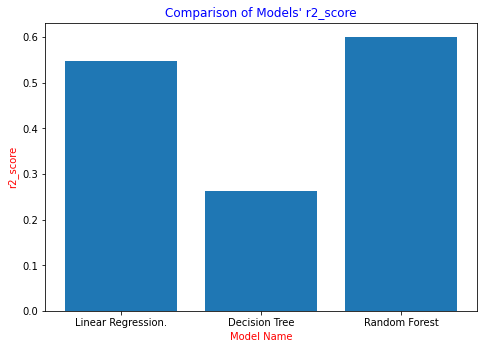

In [105]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparison of Models' r2_score", color='b')
ax.set_xlabel('Model Name', color='r')
ax.set_ylabel('r2_score', color='r')
models_names = ['Linear Regression.', 'Decision Tree', 'Random Forest']
r2_score = [r2_lin,r2_tree,r2_random]
ax.bar(models_names, r2_score)
plt.show()

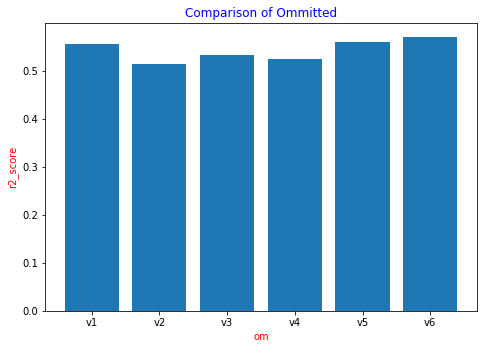

In [106]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparison of Ommitted", color='b')
ax.set_xlabel('om',color='r')
ax.set_ylabel('r2_score', color='r')
models_names = ['v1','v2','v3','v4','v5','v6']
r2_score = [v1,v2,v3,v4,v5,v6]
ax.bar(models_names, r2_score)
plt.show()

In [5]:
df1.corr()["grade"].sort_values(ascending=False)

grade            1.000000
sqft_living      0.762704
sqft_above       0.755923
sqft_living15    0.713202
price            0.667434
bathrooms        0.664983
floors           0.458183
yr_built         0.446963
bedrooms         0.356967
view             0.251321
long             0.198372
sqft_basement    0.168392
sqft_lot15       0.119248
lat              0.114084
sqft_lot         0.113621
waterfront       0.082775
yr_renovated     0.014414
id               0.008130
condition       -0.144674
zipcode         -0.184862
Name: grade, dtype: float64

In [11]:
X = df1[["sqft_living","bathrooms","sqft_above","sqft_living15"]]
Y = df1["grade"]

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [14]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y, test_size=0.5,random_state=3)

tree_classifier = tree.DecisionTreeClassifier(criterion = 'entropy') 
tree_classifier = tree_classifier.fit(X, Y)
prediction = tree_classifier.predict(X_test) 
error_rate = np.mean(prediction != Y_test)

print(error_rate)

0.028407513648561117

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
N = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
d = [1,2,3,4,5,6,7,8,9,10]
df99 = pd.DataFrame(columns = ["N", "d", "er"])
A = []
B = []
C = []
for i in N:
    for j in d:
        model = RandomForestClassifier(n_estimators=i, max_depth=j, criterion='entropy')
        model.fit(X_train , Y_train)
        prediction = model.predict(X_test) 
        error_rate = np.mean(prediction != Y_test)
        A.append(i)
        B.append(j)
        C.append(error_rate)


In [72]:
df99['N'] = A
df99['d'] = B
df99['er'] = C

In [107]:
d = df99['er'].max()
d

0.5175349310631998

In [74]:
df99.loc[(df99['er'] == d)]

,N,d,er
150,16,1,0.517535
